# **The Sparks Foundation** 

**Author : Hetvi Shah**



# Task 2 - Prediction using Unsupervised ML

> From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.






In [ ]:
#Importing the modules
 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
plt.style.use('fivethirtyeight')

In [ ]:
#Load the Dataset
Iris_df = pd.read_csv('/content/Iris.csv')
Iris_df.drop(columns='Species',inplace=True)
Iris_df.head() #See the first 5 rows


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


[]

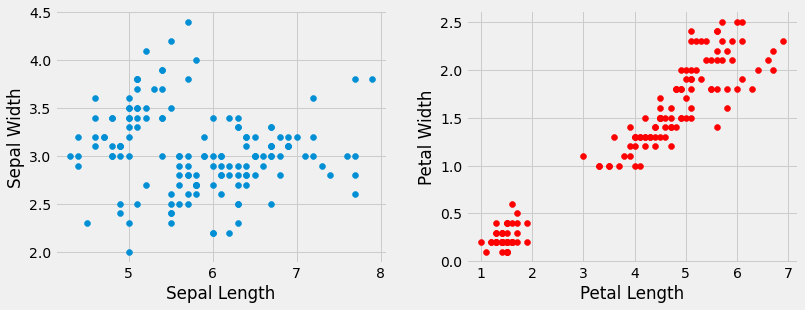

In [ ]:
#Visualizing the dataset
fig, ax = plt.subplots(1,2,figsize=(12, 5)) #We have 1 row and 2 columns in our subplot
fig.tight_layout(pad=3.0)

#Visualizing the first two columns
ax[0].scatter(Iris_df['SepalLengthCm'], Iris_df['SepalWidthCm'])
ax[0].set_xlabel('Sepal Length')
ax[0].set_ylabel('Sepal Width')

#Visualizing the last two columns
ax[1].scatter(Iris_df['PetalLengthCm'], Iris_df['PetalWidthCm'],color = 'r')
ax[1].set_xlabel('Petal Length')
ax[1].set_ylabel('Petal Width')

plt.plot()

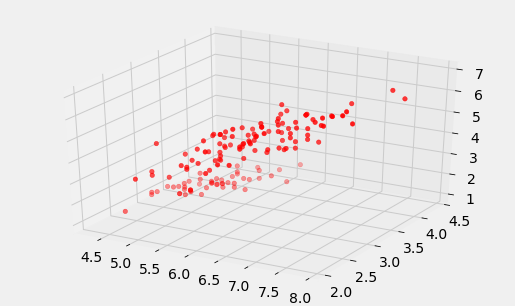

In [ ]:
#3D visualization
fig=plt.figure(figsize=(8,5))
ax=plt.axes(projection='3d')
ax.scatter(Iris_df['SepalLengthCm'], Iris_df['SepalWidthCm'],Iris_df['PetalLengthCm'],color='red')
plt.show()

# Data Preprocessing

In [ ]:
Iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


We have 150 rows and 5 columns in our dataset



In [ ]:
#Check for missing values
Iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

In [ ]:
#Check for duplicates
duplicate = Iris_df.duplicated()
duplicate.sum()


0

Text(0.5, 3.700000000000024, 'Petal Width')

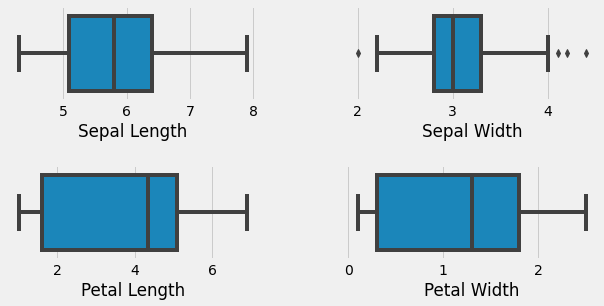

In [ ]:
f, ax = plt.subplots(2,2,figsize= (10,5))
f.tight_layout(pad=3)

sns.boxplot(ax= ax[0,0],x=Iris_df['SepalLengthCm'])
ax[0,0].set_xlabel('Sepal Length')
sns.boxplot(ax= ax[0,1],x=Iris_df['SepalWidthCm'])
ax[0,1].set_xlabel('Sepal Width')
sns.boxplot(ax= ax[1,0],x=Iris_df['PetalLengthCm'])
ax[1,0].set_xlabel('Petal Length')
sns.boxplot(ax= ax[1,1],x=Iris_df['PetalWidthCm'])
ax[1,1].set_xlabel('Petal Width')

As seen above, we have four outliers present in the column **SepalWidthCm**. We will remove these outliers in order to make our prediction mode accurate.

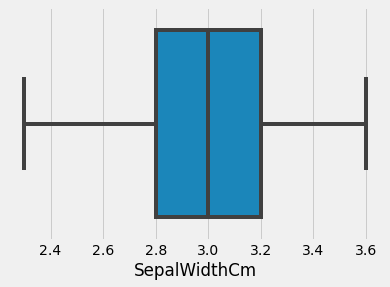

In [ ]:
def Remove_Outliers(df,col,lower_quantile, upper_quantile):
  lower = df[col].quantile(lower_quantile)
  upper = df[col].quantile(upper_quantile)
  df_new = df.loc[(df[col]> lower)&(df[col] < upper)]
  return df_new

Retail_df = Remove_Outliers(Iris_df,'SepalWidthCm',0.01,0.90)
sns.boxplot(x= Retail_df['SepalWidthCm'])

Our Dataset is now clean. We will further move on with the prediction.

# Finding the optimum number of clusters using the Elbow Method Graph

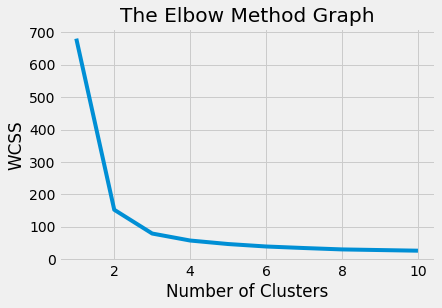

In [ ]:
x = Iris_df.iloc[:, [1, 2, 3, 4]].values #Store the values in an array

wcss= [] # array to store the sum of the squared distance between each member of the cluster and its centroid

for i in range(1,11):
  
  kmeans = KMeans(n_clusters=i, init=('k-means++'), n_init =10, max_iter =300, random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title("The Elbow Method Graph")
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

The optimum number of cluster occurs when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.
Hence, from the figure above we would choose the number of clusters to be **3.**

# Model Training and Cluster Prediction

In [ ]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)  #Predicts cluster index for each sample

# Cluster Visualization

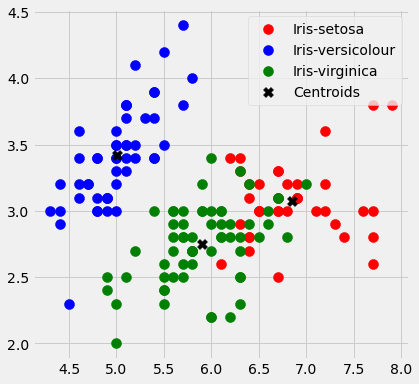

In [ ]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(6, 6))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s= 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, color = 'k',marker ='X', label = 'Centroids')

plt.legend()

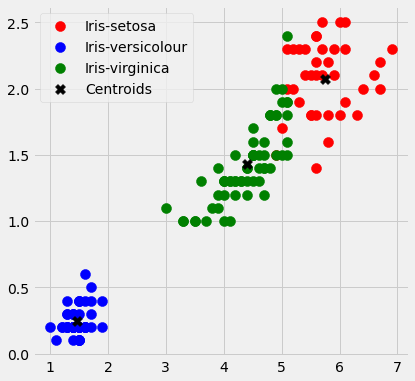

In [ ]:
# Visualising the clusters - On the last two columns
plt.figure(figsize=(6, 6))
plt.scatter(x[y_kmeans == 0, 2], x[y_kmeans == 0, 3], 
            s= 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 2], x[y_kmeans == 1, 3], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 2], x[y_kmeans == 2, 3],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], 
            s = 100, color = 'k',marker ='X', label = 'Centroids')

plt.legend()

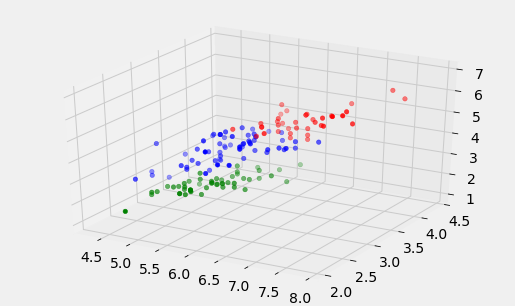

In [ ]:
#3D visualization 
fig=plt.figure(figsize=(8,5))
ax=plt.axes(projection='3d')

ax.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],x[y_kmeans==0,2],color='red')
ax.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],x[y_kmeans==1,2],color='green')
ax.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],x[y_kmeans==2,2],color='blue')


